In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [4]:
lr = LinearRegression()


ames = pd.read_csv("AmesHousing.csv")
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]



X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_s = (X_train - X_train.mean())/X_train.std()

lr_fitted = lr.fit(X_train_s, y_train)
lr_fitted.coef_

NameError: name 'pd' is not defined

In [53]:
lr_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('linear_regression', LinearRegression())])

TypeError: 'ColumnTransformer' object is not callable

In [54]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop" #this means the model will only use the variables mentioned in column transformers
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Bldg Type']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'TotRms AbvGrd'])])),
                ('linear_regression', LinearRegression())])

In [ ]:
lr_pipeline.fit(X_train, y_train)

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [5]:
pip install palmerpenguins

In [6]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer




In [7]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [9]:
enc = OneHotEncoder()
enc.fit(penguins[["species"]]) #learns the categories of the species variable

species= enc.transform(penguins[["species"]]).toarray() #puts the variables in alphabetical order
species_df = pd.DataFrame(species, columns=enc.categories_)
species_df.head()

,Adelie,Chinstrap,Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [10]:
penguins["Adelie"]= species_df["Adelie"]
penguins["Chinstrap"]= species_df["Chinstrap"]
penguins["Gentoo"]= species_df["Gentoo"]
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0


In [11]:
enc.fit(penguins[["island"]]) #learns the categories of the species variable

island= enc.transform(penguins[["island"]]).toarray() #puts the variables in alphabetical order
island_df = pd.DataFrame(species, columns=enc.categories_)
island_df.head()

,Biscoe,Dream,Torgersen
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [12]:
penguins["Biscoe"]= island_df["Biscoe"]
penguins["Dream"]= island_df["Dream"]
penguins["Torgersen"]= island_df["Torgersen"]
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0,1.0,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
enc.fit(penguins[["sex"]]) #learns the categories of the species variable

sex= enc.transform(penguins[["sex"]]).toarray() #puts the variables in alphabetical order
sex_df = pd.DataFrame(sex, columns=enc.categories_)
# sex_df.head()
penguins["Male"]= sex_df["male"]
penguins["Female"]= sex_df["female"]
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,Male,Female
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [14]:
lr = LinearRegression()


In [15]:
# penguins

In [15]:
penguins = penguins.dropna(subset = ["bill_depth_mm"])

In [16]:
y = penguins["bill_depth_mm"]
X = penguins[["Male"]]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [18]:
lr_simple = lr.fit(X_train,y_train)

In [19]:
y_preds = lr_simple.predict(X_test)

In [20]:
mse_test1 = mean_squared_error(y_test, y_preds)
mse_train1 = mean_squared_error(y_train, lr_simple.predict(X_train))
print(mse_test1, mse_train1)

3.5665293211728595 3.314913611641221


In [ ]:
#model 2

In [21]:
penguins = penguins.dropna(subset = ["body_mass_g"])

In [22]:
y = penguins["bill_depth_mm"]
X = penguins[["Male", "body_mass_g", "bill_length_mm", "flipper_length_mm"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [24]:
lr_simple = lr.fit(X_train,y_train)
y_preds = lr_simple.predict(X_test)
mse_test2 = mean_squared_error(y_test, y_preds)
mse_train2 = mean_squared_error(y_train, lr_simple.predict(X_train))
print(mse_test2, mse_train2)

1.5824462317713204 1.2725389440952017


In [25]:
ct1= ColumnTransformer(
    [
      ("keep", FunctionTransformer(None), ["Male", "body_mass_g"]),

    ],
    remainder = "drop"
).set_output(transform="pandas")

# transformed = ct1.fit_transform(X_train)
# transformed

In [26]:
ct2 = ColumnTransformer(
    [
        ("interaction", PolynomialFeatures(interaction_only= True), ["keep__Male", "keep__body_mass_g"])
    ],
    remainder = "passthrough"
).set_output(transform="pandas")


In [27]:
model3_pipeline = Pipeline(
  [("preprocessing", ct1),
   ("interaction", ct2),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")
model3 = model3_pipeline.fit(X_train, y_train)
y_preds  = model3.predict(X_test)
mse_test3 = mean_squared_error(y_test, y_preds)
mse_train3 = mean_squared_error(y_train, model3.predict(X_train))
print(mse_test3, mse_train3)

1.65838844047217 1.4419159455904351


In [28]:
#model 4

penguins = penguins.dropna(subset = ["flipper_length_mm", "bill_length_mm"])

ct1= ColumnTransformer(
    [
      ("keep", FunctionTransformer(None), ["Male", "body_mass_g", "flipper_length_mm", "bill_length_mm"]),

    ],
    remainder = "drop"
).set_output(transform="pandas")


In [29]:
model4_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")
model4 = model4_pipeline.fit(X_train, y_train)
y_preds  = model4.predict(X_test)
mse_test4 = mean_squared_error(y_test, y_preds)
mse_train4 = mean_squared_error(y_train, model4.predict(X_train))
print(mse_test4, mse_train4)

1.5824462317713202 1.272538944095202


In [30]:
from plotnine import ggplot, geom_point, geom_line, aes

In [31]:
df = pd.DataFrame({"y_test":y_test, "y_preds":y_preds)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (<ipython-input-31-23859cac2dca>, line 1)

In [33]:
MSE_df = pd.DataFrame({ "MSE test" : [ mse_test1, mse_test2, mse_test3, mse_test4], "MSE train" : [ mse_train1, mse_train2, mse_train3, mse_train4]})

In [42]:
longform = MSE_df.melt(id_vars = "Model", var_name = "MSE", value_vars= ["MSE test", "MSE train"])

In [43]:
longform


,Model,MSE,value
0,model1,MSE test,3.566529
1,model2,MSE test,1.582446
2,model3,MSE test,1.658388
3,model4,MSE test,1.582446
4,model1,MSE train,3.314914
5,model2,MSE train,1.272539
6,model3,MSE train,1.441916
7,model4,MSE train,1.272539


In [36]:
MSE_df["Model"] = ["model1", "model2", "model3", "model4"]

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:112: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


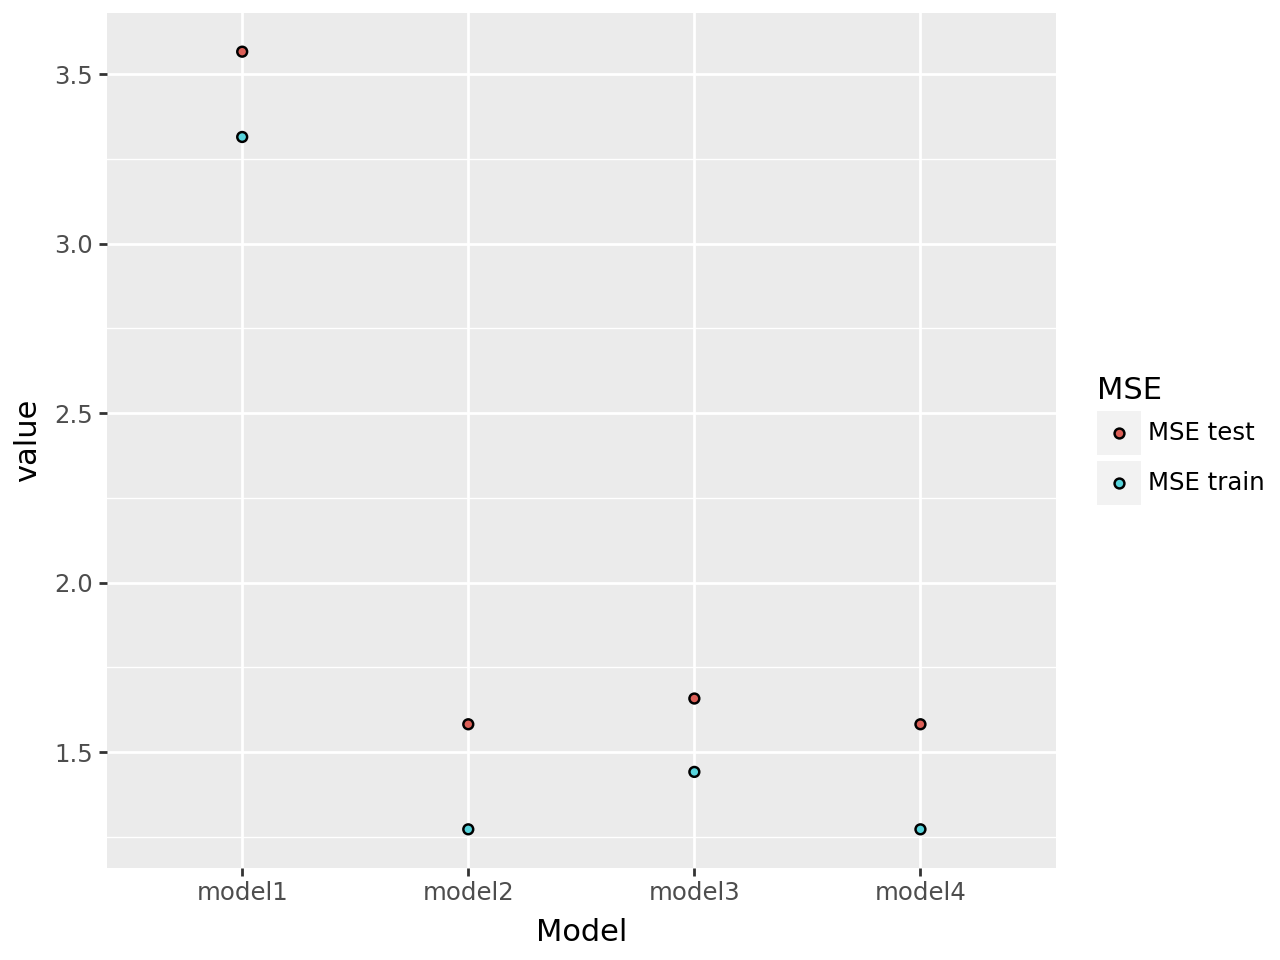

In [48]:
from operator import ge
(ggplot(longform, aes(x = "Model", y= "value", fill = "MSE")) + geom_point())